# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [ ]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames
# end.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [4]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

In [5]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression


# Your written answer here - do these seem like good candidates for linear regression?
Yes.We can compare the Sale Price against;

1.  LotArea: Lot size in square feet

2. 1stFlrSF: First Floor square feet

3. GrLivArea: Above grade (ground) living area square feet


## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [6]:
# Your code here - define y and baseline X
y = ames_subset['SalePrice']
X = ames_subset['LotArea']




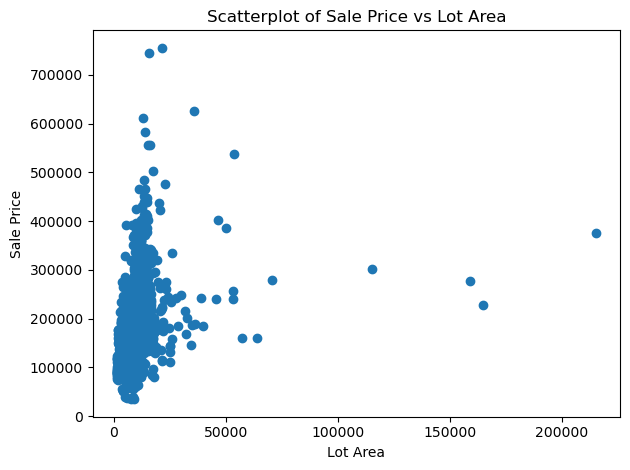

In [6]:
#Create a scatterplot
plt.scatter(X, y)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Scatterplot of Sale Price vs Lot Area')
plt.tight_layout()
plt.show()

In [7]:
# Your code here - import StatsModels, fit baseline model, display results

Model_0= sm.OLS(y, sm.add_constant(X)).fit()
print(Model_0.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           1.12e-24
Time:                        06:37:41   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.588e+05   2914.717     54.495      0.0

# Your written answer here - interpret model results

we can interpret the model results as follows:
1. The intercept (const) is 1.59, which represents the estimated *Saleprice* when the *LotArea* is zero. However, this value may not be meaningful in a practical sense since a lot area of zero is not realistic.

$$ \hat{SalesPrice} = 1.59 + 2.10 LotArea $$

2. The coefficient for LotArea is 2.10, which indicates that for each additional square foot of lot area, the sale price is expected to increase by approximately $2.10, holding all other factors constant.
3. The R-squared value is 0.070, which means that only 7% of the variability in sale price can be explained by the lot area alone. This suggests that there are other factors influencing sale price that are not captured by this model.
4. The p-value for LotArea is extremely small (0.000) meanining less than 0.05 , indicating that the relationship between lot area and sale price is statistically significant.
5. The F-statistic is 109.6 with a p-value of 0.000, indicating that the overall model is statistically significant.









## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [8]:
# Your code here - define X
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]

In [9]:
# Your code here - fit model and display results
Model_1 = sm.OLS(y, sm.add_constant(X)).fit()

print(Model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          1.57e-262
Time:                        06:37:49   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

When we take all the features,the model can be defined as follows;
$$ \hat{SalePrice} = -1.431 + 0.2842 LotArea + 60.287  1stFlrSF + 80.61 GrLivArea 

# Your written answer here - interpret model results. Does this model seem better than the previous one?
1.  The model is statistically significant overall, with an F-statistic p-value well below 0.05
2. The model explains about 56.5% of the variance in SalePrice, which is a significant improvement over the previous model.
3.  All three predictors are statistically significant, with p-values well below 0.05.
4.  The coefficients for LotArea, 1stFlrSF and GrLivArea are positive, indicating that as these variables increase, SalePrice also increases.
5.  The coefficient for LotArea is 0.2842, which means that for every additional square foot of LotArea, SalePrice increases by $0.28.
6.  The coefficient for 1stFlrSF is 60.287, which means that for every additional square foot of 1stFlrSF, SalePrice increases by $60.287.
7.  The coefficient for GrLivArea is 80.61, which means that for every additional square foot of GrLivArea, SalePrice increases by $80.61.
8. The additional 2 predictors to the first predictor significantly increased the R-squared  by 49% indicates  that the model is  better than the previous one.
9.  The model is statistically significant overall, with an F-statistic p-value well below 0.05.
10. The model explains about 56.5% of the variance in SalePrice, which is a significant improvement over the previous model.
11.  All three predictors are statistically significant, with p-values well below 0.05.






## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

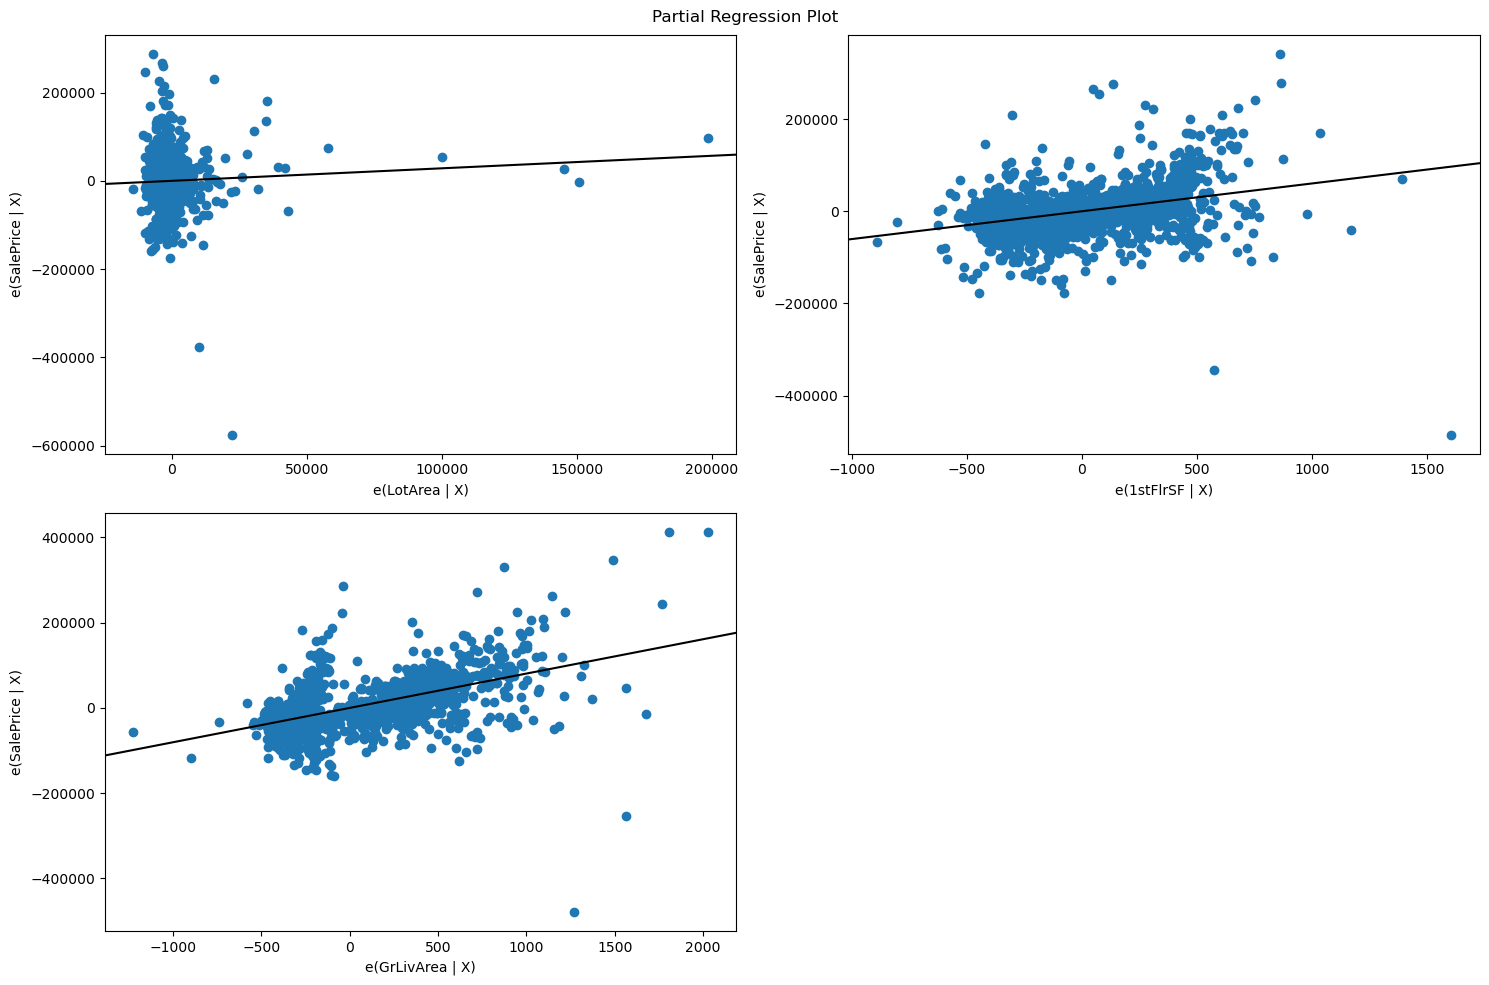

In [10]:
# Your code here - create partial regression plots for each predictor
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(Model_1, exog_idx= ['LotArea', '1stFlrSF', 'GrLivArea'], fig=fig)
plt.tight_layout()
plt.show()


# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?
1.The partial regression plots show the relationship between each predictor and the response variable (Sale Price) while controlling for the other predictors.

2. The partial regression plot for LotArea shows a positive linear relationship with Sale Price, indicating that as Lot Area increases, Sale Price tends to increase as well. This is consistent with the scatterplot we created earlier, which also showed a positive relationship between Lot Area and Sale Price.

3. The partial regression plot for 1stFlrSF also shows a positive linear relationship with Sale Price, indicating that as 1stFlrSF increases, Sale Price tends to increase. This is also consistent with the scatterplot we created earlier, which showed a positive relationship between 1stFlrSF and Sale Price.

4. The partial regression plot for GrLivArea shows a positive linear relationship with Sale Price, indicating that as GrLivArea increases, Sale Price tends to increase. This is also consistent with the scatterplot we created earlier, which showed a positive relationship between GrLivArea and Sale Price.

5. Overall, the partial regression plots confirm the positive relationships we observed in the scatterplots and suggest that all three predictors (LotArea, 1stFlrSF, and GrLivArea) are positively associated with Sale Price. The partial regression plots also show that the relationships are linear, which is consistent with our initial assumption of a linear relationship between the predictors and the response variable.

We can conclude that all three predictors are positively associated with Sale Price, and the relationships are linear. This suggests that as Lot Area, 1stFlrSF, and GrLivArea increase, Sale Price tends to increase as well.

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [11]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]
y = ames_subset['SalePrice']
Model2 = LinearRegression()

Model2.fit(X, y)

LinearRegression()

In [12]:
# Your code here - compare R-Squared
print('R-squared from StatsModels:', Model_1.rsquared)
print('R-squared from Scikit-learn:', Model2.score(X, y))

R-squared from StatsModels: 0.5649801771384368
R-squared from Scikit-learn: 0.5649801771384368


In [12]:
# Your code here - compare intercept and coefficients
print('Intercept from StatsModels:', Model_1.params[0])
print('Intercept from Scikit-learn:', Model2.intercept_)
print('Coefficients from StatsModels:', Model_1.params[1:])
print('Coefficients from Scikit-learn:', Model2.coef_)


Intercept from StatsModels: -14313.408857494349
Intercept from Scikit-learn: -14313.408857494564
Coefficients from StatsModels: LotArea       0.284134
1stFlrSF     60.286646
GrLivArea    80.606058
dtype: float64
Coefficients from Scikit-learn: [ 0.28413359 60.28664625 80.60605834]


/var/folders/5f/wlcdrg691b9chs3yjnrn1b8c0000gn/T/ipykernel_19983/1098499658.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Intercept from StatsModels:', Model_1.params[0])


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.